# *Developing a function for the KNN Algorithm and applying dataset to this model*

Importing Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import time

Mounting Google Drive to access the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading data from csv file

dataset = pd.read_csv('/content/drive/MyDrive/ML_2023/processed_dataset.csv')

Creating a function to buld and train the ML Model

In [ ]:
x = pd.DataFrame(dataset.iloc[:, 0:4].values)
y = dataset.iloc[:, 4].values

In [ ]:
# Generating training and test data sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [ ]:
# Importing KNN

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
start_time = time.time()
knn.fit(x_train, y_train)
end_time = time.time()
fit_time = end_time - start_time
print("Fit Time:", fit_time, "seconds")


Fit Time: 0.016476673126220703 seconds


In [ ]:
start_time = time.time()
y_pred = knn.predict(x_test)
end_time = time.time()
prediction_time = end_time - start_time

In [ ]:
# Prediction Metrics

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

MSE = mse(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
MAX_ERROR = max_error(y_test, y_pred);
MEAN_ABSOLUTE_ERROR = mean_absolute_error(y_test, y_pred)
MAPE = mean_absolute_percentage_error(y_test, y_pred)


print("Mean Squared Error", MSE)
print("R-Squared: ", R2)
print("Max Error", MAX_ERROR);
print("Mean Absolute Error", MEAN_ABSOLUTE_ERROR);
print("MAPE", MAPE);
print("Prediction Time:", prediction_time, "seconds")

Mean Squared Error 4.672376822728611
R-Squared:  0.7878439627968854
Max Error 26.801079503000004
Mean Absolute Error 0.877491242561779
MAPE 0.10833338871483403
Prediction Time: 0.02754865646362305 seconds


Create a function that will plot a graph between the predicted and actual values

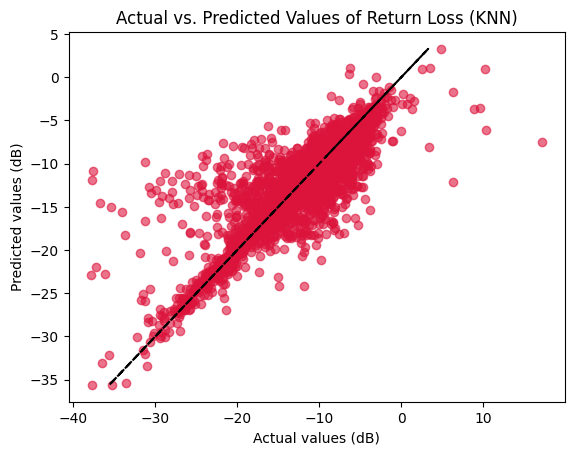

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=y_test, y=y_pred, c='crimson', alpha=0.6)
plt.plot(y_pred, y_pred,color='black', linestyle='dashed')
plt.title('Actual vs. Predicted Values of Return Loss (KNN)')
plt.xlabel('Actual values (dB)')
plt.ylabel('Predicted values (dB)')
plt.show()